In [2]:
from scipy.stats import qmc
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import shutil
import os
import numpy as np
from scipy.integrate import simps
from sklearn.metrics import mean_squared_error
from math import sqrt
import subprocess
import warnings
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap
import contextily as ctx
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")

In [53]:
#reading in data with relative paths so that it can be used by others who clone repository from github
script_dir = os.getcwd()

# the baseline were useing for treeplanting scenatio is all grass and its been extended 5km 
narrow40_source_folder = os.path.abspath(os.path.join(script_dir, 'scenarios','scenario_inputs', 'sensitivity_analysis', 'july_allgrassextended_narrow40'))
narrow30_source_folder = os.path.abspath(os.path.join(script_dir, 'scenarios','scenario_inputs', 'sensitivity_analysis', 'july_allgrassextended_narrow30'))
narrow20_source_folder = os.path.abspath(os.path.join(script_dir, 'scenarios','scenario_inputs', 'sensitivity_analysis', 'july_allgrassextended_narrow20'))

# the baseline were useing for treeremoval scenatio is all forest and its been extended 5km 
widen40_source_folder = os.path.abspath(os.path.join(script_dir, 'scenarios','scenario_inputs', 'sensitivity_analysis', 'july_allforestextended_widen40'))
widen30_source_folder = os.path.abspath(os.path.join(script_dir, 'scenarios','scenario_inputs', 'sensitivity_analysis', 'july_allforestextended_widen30'))
widen20_source_folder = os.path.abspath(os.path.join(script_dir, 'scenarios','scenario_inputs', 'sensitivity_analysis', 'july_allforestextended_widen20'))

#Temperature Observations folder
observed_temp_path = os.path.abspath(os.path.join(script_dir, 'observations', 'TemperatureDataObs'))
#Temperature observations
obs = pd.read_csv(os.path.join(observed_temp_path, 'HourlySummer23Master_riverkm.csv'))

In [14]:
#getting date times for modeled outputs
control_file = pd.read_csv(os.path.join(narrow40_source_folder, 'HeatSource_Control.csv'))
cc_start = control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)

#reading observed hourly temps for model range (for joining datetimes)
#obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
#obs_clip = obs[(obs["datetime"]>='07-01-2023') & (obs["datetime"]<'07-02-2023')]# + pd.DateOffset(1))]
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]

# Make observed temps compatible with heatsource outputs
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
#obs_clip.drop(19.2, axis=1, inplace=True)
obs_clip_mean = obs_clip.resample('D').mean()

### Plotting temperature profiles from the all grass baselines with varying width changes

In [34]:
### Get temps from 40% narrowing simulation ###
narrow40__folder = os.path.abspath(os.path.join(narrow40_source_folder))
narrow40_tw_df = pd.read_csv(os.path.join(narrow40__folder, 'outputs', 'Temp_H2O.csv'), skiprows=6, usecols=range(1, 237))
narrow40_tw_df.columns = [float(col) for col in narrow40_tw_df.columns]
narrow40_tw_df.index = obs_clip.index
# mean july temperature summary
mean_narrow40 = narrow40_tw_df.resample('D').mean()
mean_narrow40 = mean_narrow40.mean()    
mean_narrow40 = pd.DataFrame(mean_narrow40)
mean_narrow40 = mean_narrow40.reset_index()
mean_narrow40.rename(columns={'index': 'NODE_ID', 0 : 'Mean July Temp'}, inplace=True)

In [38]:
### Get temps from 30% narrowing simulation ###
narrow30__folder = os.path.abspath(os.path.join(narrow30_source_folder))
narrow30_tw_df = pd.read_csv(os.path.join(narrow30__folder, 'outputs', 'Temp_H2O.csv'), skiprows=6, usecols=range(1, 237))
narrow30_tw_df.columns = [float(col) for col in narrow30_tw_df.columns]
narrow30_tw_df.index = obs_clip.index
# mean july temperature summary
mean_narrow30 = narrow30_tw_df.resample('D').mean()
mean_narrow30 = mean_narrow30.mean()    
mean_narrow30 = pd.DataFrame(mean_narrow30)
mean_narrow30 = mean_narrow30.reset_index()
mean_narrow30.rename(columns={'index': 'NODE_ID', 0 : 'Mean July Temp'}, inplace=True)

In [44]:
### Get temps from 20% narrowing simulation ###
narrow20__folder = os.path.abspath(os.path.join(narrow20_source_folder))
narrow20_tw_df = pd.read_csv(os.path.join(narrow20__folder, 'outputs', 'Temp_H2O.csv'), skiprows=6, usecols=range(1, 237))
narrow20_tw_df.columns = [float(col) for col in narrow20_tw_df.columns]
narrow20_tw_df.index = obs_clip.index
# mean july temperature summary
mean_narrow20 = narrow20_tw_df.resample('D').mean()
mean_narrow20 = mean_narrow20.mean()    
mean_narrow20 = pd.DataFrame(mean_narrow20)
mean_narrow20 = mean_narrow20.reset_index()
mean_narrow20.rename(columns={'index': 'NODE_ID', 0 : 'Mean July Temp'}, inplace=True)

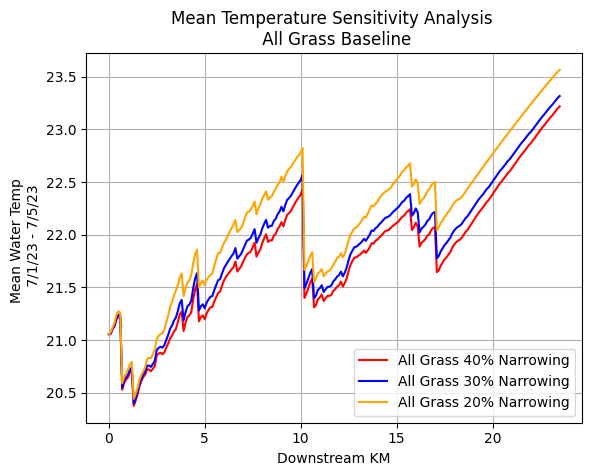

In [48]:
#plt.fill_between([23.5 - km_start, 23.5 - km_end], upstreamconstant_modeled['Mean July Temp'].min(),upstreamconstant_modeled['Mean July Temp'].max(), color='orange', alpha = .5, label = 'Narrowed Forest reaches and Shade Removed')
plt.plot(23.5-mean_narrow40['NODE_ID'], mean_narrow40['Mean July Temp'], label=f'All Grass 40% Narrowing', color = 'red')
plt.plot(23.5-mean_narrow30['NODE_ID'], mean_narrow30['Mean July Temp'], label=f'All Grass 30% Narrowing', color = 'blue')
plt.plot(23.5-mean_narrow20['NODE_ID'], mean_narrow20['Mean July Temp'], label=f'All Grass 20% Narrowing', color = 'orange')


#plt.plot(23.5-upstreamconstant_modeled['NODE_ID'], upstreamconstant_modeled['Mean July Temp'], label='Base Model')
#plt.set_title(f'Max July MWAT - Shade added between {23.5 - km_start} km and {23.5 - km_end} km')
plt.title(f'Mean Temperature Sensitivity Analysis \n All Grass Baseline')

plt.xlabel('Downstream KM')  # Replace 'X Label' with appropriate label
plt.ylabel('Mean Water Temp \n 7/1/23 - 7/5/23')  # Replace 'Y Label' with appropriate label
#plt.text(0.75, 0.1, f'Area Between Curves = {round(area,2)}', horizontalalignment='center', transform=plt.transAxes)

# Plot the shade data on the second y-axis
# plt = plt.twinx()
# plt.plot(23.5-shade.index, shade[0], label='Mean Solar Radiation Flux \n At Stream Surface', color='red', alpha = .5)
# plt.set_ylabel('Mean Solar Radiation Flux \n At Stream Surface (W/m2)', color = 'red')
# plt.tick_params(axis='y', colors='red')

#plt.vlines([23.5 - km_start, 23.5 - km_end], ymin = upstreamconstant_modeled['Max MWAT'].min(), ymax = upstreamconstant_modeled['Max MWAT'].max(),color = 'orange', linestyles = 'dashed')
plt.grid(True) 
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(script_dir, 'Figures', 'AllGrass_WidthSensitivity.png'), bbox_inches='tight', dpi=300)



### Plotting temperature profiles from the all forest baselines with varying width changes

In [54]:
### Get temps from 40% widening simulation ###
widen40__folder = os.path.abspath(os.path.join(widen40_source_folder))
widen40_tw_df = pd.read_csv(os.path.join(widen40_source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6, usecols=range(1, 237))
widen40_tw_df.columns = [float(col) for col in widen40_tw_df.columns]
widen40_tw_df.index = obs_clip.index
# mean july temperature summary
mean_widen40 = widen40_tw_df.resample('D').mean()
mean_widen40 = mean_widen40.mean()    
mean_widen40 = pd.DataFrame(mean_widen40)
mean_widen40 = mean_widen40.reset_index()
mean_widen40.rename(columns={'index': 'NODE_ID', 0 : 'Mean July Temp'}, inplace=True)

In [56]:
### Get temps from 40% widening simulation ###
widen30__folder = os.path.abspath(os.path.join(widen30_source_folder))
widen30_tw_df = pd.read_csv(os.path.join(widen30__folder, 'outputs', 'Temp_H2O.csv'), skiprows=6, usecols=range(1, 237))
widen30_tw_df.columns = [float(col) for col in widen30_tw_df.columns]
widen30_tw_df.index = obs_clip.index
# mean july temperature summary
mean_widen30 = widen30_tw_df.resample('D').mean()
mean_widen30 = mean_widen30.mean()    
mean_widen30 = pd.DataFrame(mean_widen30)
mean_widen30 = mean_widen30.reset_index()
mean_widen30.rename(columns={'index': 'NODE_ID', 0 : 'Mean July Temp'}, inplace=True)

In [57]:
### Get temps from 20% narrowing simulation ###
narrow20__folder = os.path.abspath(os.path.join(narrow20_source_folder))
narrow20_tw_df = pd.read_csv(os.path.join(narrow20__folder, 'outputs', 'Temp_H2O.csv'), skiprows=6, usecols=range(1, 237))
narrow20_tw_df.columns = [float(col) for col in narrow20_tw_df.columns]
narrow20_tw_df.index = obs_clip.index
# mean july temperature summary
mean_narrow20 = narrow20_tw_df.resample('D').mean()
mean_narrow20 = mean_narrow20.mean()    
mean_narrow20 = pd.DataFrame(mean_narrow20)
mean_narrow20 = mean_narrow20.reset_index()
mean_narrow20.rename(columns={'index': 'NODE_ID', 0 : 'Mean July Temp'}, inplace=True)